In [1]:
#Step1 (Getting the right arrows into our quiver)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #Hide unnecessary warnings
import re #RegEx

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer 
from yellowbrick.cluster import InterclusterDistance
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 200
pd.options.display.max_columns = 300
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#Accessing Files - Part 1
from google.colab import files

upload = files.upload()

Saving fundamentals.csv to fundamentals.csv
Saving securities.csv to securities.csv


In [4]:
#Accessing Files - Part 2
import io
dataframe_fund = pd.read_csv(io.BytesIO(upload['fundamentals.csv']))
dataframe_sec = pd.read_csv(io.BytesIO(upload['securities.csv']))

In [5]:
#Data Observation: Fundamentals
dataframe_fund.head(2)

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.0,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-569000000.0,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,473000000.0,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,386000000.0,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,845000000.0,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.0,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.0,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-346000000.0,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-235000000.0,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,559000000.0,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,853000000.0,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.0,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08


In [6]:
#Data Observation: Securities
dataframe_sec.head(2)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800


In [7]:
display(HTML('The fundamentals dataset has <b>' +str(dataframe_fund.shape[1])+' features </b>and <b>'+str(dataframe_fund.shape[0])
             +' observations</b>'))

In [8]:
display(HTML('The securities datatset has <b>' +str(dataframe_sec.shape[1])+' features </b> and <b>' +str(dataframe_sec.shape[0])+' observations</b>'))

In [9]:
display(HTML(' <h2>Features having NaN values with counts </h2>'))
dataframe_fund[dataframe_fund.columns[dataframe_fund.isna().any()]].isna().sum().to_frame().T

,Cash Ratio,Current Ratio,Quick Ratio,For Year,Earnings Per Share,Estimated Shares Outstanding
0,299,299,299,173,219,219


In [10]:
display(HTML('<h2> Random sample display </h2>'))
dataframe_fund.sample(2).T

,1231,421
Unnamed: 0,1231,421
Ticker Symbol,PBI,CVX
Period Ending,2015-12-31,2013-12-31
Accounts Payable,1.81797e+09,3.2644e+10
Accounts Receivable,8.2767e+07,1.83e+08
Add'l income/expense items,9.4838e+07,1.165e+09
After Tax ROE,228,14
Capital Expenditures,-1.66329e+08,-3.7985e+10
Capital Surplus,1.6128e+08,1.5713e+10
Cash Ratio,34,50


In [11]:
#Renaming Columns
temp = {n : re.sub('[^A-Za-z0-9]+','',n) for n in dataframe_fund.columns.values}

In [12]:
dataframe_fund.rename(columns = temp,inplace=True)
dataframe_fund.head(2)

,Unnamed0,TickerSymbol,PeriodEnding,AccountsPayable,AccountsReceivable,Addlincomeexpenseitems,AfterTaxROE,CapitalExpenditures,CapitalSurplus,CashRatio,CashandCashEquivalents,ChangesinInventories,CommonStocks,CostofRevenue,CurrentRatio,DeferredAssetCharges,DeferredLiabilityCharges,Depreciation,EarningsBeforeInterestandTax,EarningsBeforeTax,EffectofExchangeRate,EquityEarningsLossUnconsolidatedSubsidiary,FixedAssets,Goodwill,GrossMargin,GrossProfit,IncomeTax,IntangibleAssets,InterestExpense,Inventory,Investments,Liabilities,LongTermDebt,LongTermInvestments,MinorityInterest,MiscStocks,NetBorrowings,NetCashFlow,NetCashFlowOperating,NetCashFlowsFinancing,NetCashFlowsInvesting,NetIncome,NetIncomeAdjustments,NetIncomeApplicabletoCommonShareholders,NetIncomeContOperations,NetReceivables,NonRecurringItems,OperatingIncome,OperatingMargin,OtherAssets,OtherCurrentAssets,OtherCurrentLiabilities,OtherEquity,OtherFinancingActivities,OtherInvestingActivities,OtherLiabilities,OtherOperatingActivities,OtherOperatingItems,PreTaxMargin,PreTaxROE,ProfitMargin,QuickRatio,ResearchandDevelopment,RetainedEarnings,SaleandPurchaseofStock,SalesGeneralandAdmin,ShortTermDebtCurrentPortionofLongTermDebt,ShortTermInvestments,TotalAssets,TotalCurrentAssets,TotalCurrentLiabilities,TotalEquity,TotalLiabilities,TotalLiabilitiesEquity,TotalRevenue,TreasuryStock,ForYear,EarningsPerShare,EstimatedSharesOutstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.0,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-569000000.0,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,473000000.0,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,386000000.0,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,845000000.0,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.0,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.0,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-346000000.0,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-235000000.0,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,559000000.0,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,853000000.0,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.0,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08


In [13]:
dataframe_fund.loc[:, dataframe_fund.columns.str.startswith('Sale')]

,SaleandPurchaseofStock,SalesGeneralandAdmin
0,0.000000e+00,1.297700e+10
1,0.000000e+00,1.291300e+10
2,-1.052000e+09,2.068600e+10
3,-3.846000e+09,2.127500e+10
4,-1.860000e+07,2.440721e+09
...,...,...
1776,-1.532770e+08,1.591239e+09
1777,0.000000e+00,1.613000e+09
1778,2.000000e+06,1.643000e+09
1779,-1.920000e+08,1.532000e+09


In [14]:
#dataframe_fund['TickerSymbol'].unique()
dataframe_fund.groupby(['TickerSymbol', 'Unnamed0']).count().sum()

PeriodEnding                                  1781
AccountsPayable                               1781
AccountsReceivable                            1781
Addlincomeexpenseitems                        1781
AfterTaxROE                                   1781
CapitalExpenditures                           1781
CapitalSurplus                                1781
CashRatio                                     1482
CashandCashEquivalents                        1781
ChangesinInventories                          1781
CommonStocks                                  1781
CostofRevenue                                 1781
CurrentRatio                                  1482
DeferredAssetCharges                          1781
DeferredLiabilityCharges                      1781
Depreciation                                  1781
EarningsBeforeInterestandTax                  1781
EarningsBeforeTax                             1781
EffectofExchangeRate                          1781
EquityEarningsLossUnconsolidate

In [15]:
temp_NoOfComp = pd.DataFrame(dataframe_fund.TickerSymbol.unique())

In [16]:
temp_NoOfComp

,0
0,AAL
1,AAP
2,AAPL
3,ABBV
4,ABC
...,...
443,YHOO
444,YUM
445,ZBH
446,ZION


In [17]:
#Selecting a particular value from a column in dataframe
dataframe_fund.loc[dataframe_fund['TickerSymbol'] == 'AAL']

,Unnamed0,TickerSymbol,PeriodEnding,AccountsPayable,AccountsReceivable,Addlincomeexpenseitems,AfterTaxROE,CapitalExpenditures,CapitalSurplus,CashRatio,CashandCashEquivalents,ChangesinInventories,CommonStocks,CostofRevenue,CurrentRatio,DeferredAssetCharges,DeferredLiabilityCharges,Depreciation,EarningsBeforeInterestandTax,EarningsBeforeTax,EffectofExchangeRate,EquityEarningsLossUnconsolidatedSubsidiary,FixedAssets,Goodwill,GrossMargin,GrossProfit,IncomeTax,IntangibleAssets,InterestExpense,Inventory,Investments,Liabilities,LongTermDebt,LongTermInvestments,MinorityInterest,MiscStocks,NetBorrowings,NetCashFlow,NetCashFlowOperating,NetCashFlowsFinancing,NetCashFlowsInvesting,NetIncome,NetIncomeAdjustments,NetIncomeApplicabletoCommonShareholders,NetIncomeContOperations,NetReceivables,NonRecurringItems,OperatingIncome,OperatingMargin,OtherAssets,OtherCurrentAssets,OtherCurrentLiabilities,OtherEquity,OtherFinancingActivities,OtherInvestingActivities,OtherLiabilities,OtherOperatingActivities,OtherOperatingItems,PreTaxMargin,PreTaxROE,ProfitMargin,QuickRatio,ResearchandDevelopment,RetainedEarnings,SaleandPurchaseofStock,SalesGeneralandAdmin,ShortTermDebtCurrentPortionofLongTermDebt,ShortTermInvestments,TotalAssets,TotalCurrentAssets,TotalCurrentLiabilities,TotalEquity,TotalLiabilities,TotalLiabilitiesEquity,TotalRevenue,TreasuryStock,ForYear,EarningsPerShare,EstimatedSharesOutstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,3

In [18]:
#Data Observation
dataframe_fund.head()

,Unnamed0,TickerSymbol,PeriodEnding,AccountsPayable,AccountsReceivable,Addlincomeexpenseitems,AfterTaxROE,CapitalExpenditures,CapitalSurplus,CashRatio,CashandCashEquivalents,ChangesinInventories,CommonStocks,CostofRevenue,CurrentRatio,DeferredAssetCharges,DeferredLiabilityCharges,Depreciation,EarningsBeforeInterestandTax,EarningsBeforeTax,EffectofExchangeRate,EquityEarningsLossUnconsolidatedSubsidiary,FixedAssets,Goodwill,GrossMargin,GrossProfit,IncomeTax,IntangibleAssets,InterestExpense,Inventory,Investments,Liabilities,LongTermDebt,LongTermInvestments,MinorityInterest,MiscStocks,NetBorrowings,NetCashFlow,NetCashFlowOperating,NetCashFlowsFinancing,NetCashFlowsInvesting,NetIncome,NetIncomeAdjustments,NetIncomeApplicabletoCommonShareholders,NetIncomeContOperations,NetReceivables,NonRecurringItems,OperatingIncome,OperatingMargin,OtherAssets,OtherCurrentAssets,OtherCurrentLiabilities,OtherEquity,OtherFinancingActivities,OtherInvestingActivities,OtherLiabilities,OtherOperatingActivities,OtherOperatingItems,PreTaxMargin,PreTaxROE,ProfitMargin,QuickRatio,ResearchandDevelopment,RetainedEarnings,SaleandPurchaseofStock,SalesGeneralandAdmin,ShortTermDebtCurrentPortionofLongTermDebt,ShortTermInvestments,TotalAssets,TotalCurrentAssets,TotalCurrentLiabilities,TotalEquity,TotalLiabilities,TotalLiabilitiesEquity,TotalRevenue,TreasuryStock,ForYear,EarningsPerShare,EstimatedSharesOutstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,3

In [19]:
dataframe_fund['PeriodEnding'] = pd.to_datetime(dataframe_fund['PeriodEnding'])

In [20]:
dataframe_fund['ForYear'] = dataframe_fund['PeriodEnding'].dt.year.astype('category')

In [21]:
Needed = ["TickerSymbol","ForYear","AccountsPayable","AccountsReceivable","GrossProfit","Liabilities","NetCashFlow","OperatingIncome","TotalAssets","TotalEquity","TotalLiabilities","TotalLiabilities&Equity","TotalRevenue","EarningsPerShare","Goodwill","SaleandPurchaseofStock"]

In [22]:
to_drop= [x for x in dataframe_fund.columns.values if x not in Needed]

In [23]:
dataframe_fund.drop(columns = to_drop,inplace = True)

In [24]:
display(HTML('<h2>Remaining NaN Columns after reduction</h2>'))
dataframe_fund.isna().sum().sort_values(ascending=False).to_frame().head().T

display(HTML('<b> The reduced shape of dataset is '+str(dataframe_fund.shape)))

,EarningsPerShare,ForYear,TotalRevenue,TotalLiabilities,TotalEquity
0,219,0,0,0,0


In [25]:
#Data Observation
dataframe_fund.head()

,TickerSymbol,AccountsPayable,AccountsReceivable,Goodwill,GrossProfit,Liabilities,NetCashFlow,OperatingIncome,SaleandPurchaseofStock,TotalAssets,TotalEquity,TotalLiabilities,TotalRevenue,ForYear,EarningsPerShare
0,AAL,3.068000e+09,-222000000.0,0.000000e+00,1.435600e+10,4.730000e+08,197000000.0,1.480000e+08,0.000000e+00,2.351000e+10,-7.987000e+09,2.489100e+10,2.485500e+10,2012,-5.60
1,AAL,4.975000e+09,-93000000.0,4.086000e+09,1.572400e+10,-2.350000e+08,660000000.0,1.399000e+09,0.000000e+00,4.227800e+10,-2.731000e+09,4.500900e+10,2.674300e+10,2013,-11.25
2,AAL,4.668000e+09,-160000000.0,4.091000e+09,2.703000e+10,-1.026000e+09,-146000000.0,4.249000e+09,-1.052000e+09,4.322500e+10,2.021000e+09,4.120400e+10,4.265000e+10,2014,4.02
3,AAL,5.102000e+09,352000000.0,4.091000e+09,2.989400e+10,-6.330000e+08,-604000000.0,6.204000e+09,-3.846000e+09,4.841500e+10,5.635000e+09,4.278000e+10,4.099000e+10,2015,11.39
4,AAP,2.409453e+09,-89482000.0,7.638900e+07,3.098036e+09,4.263230e+08,540210000.0,6.573150e+08,-1.860000e+07,4.613814e+09,1.210694e+09,3.403120e+09,6.205003e+09,2012,5.29


In [26]:
#Analysis of Tickers

display(HTML('<b> The dataset has ' +str(len(dataframe_fund['TickerSymbol'].unique())) +" unique tickers"))
grp_tick = dataframe_fund.groupby('TickerSymbol')
t_agg = grp_tick.agg(np.nanmean)
t_agg.head()

,AccountsPayable,AccountsReceivable,Goodwill,GrossProfit,Liabilities,NetCashFlow,OperatingIncome,SaleandPurchaseofStock,TotalAssets,TotalEquity,TotalLiabilities,TotalRevenue,EarningsPerShare
TickerSymbol,,,,,,,,,,,,,
AAL,4.453250e+09,-3.075000e+07,3.067000e+09,2.175100e+10,-3.552500e+08,2.675000e+07,3.000000e+09,-1.224500e+09,3.935700e+10,-7.655000e+08,3.847100e+10,3.380950e+10,-0.3600
AAP,3.097954e+09,-4.789875e+07,5.652835e+08,3.806642e+09,2.419820e+08,8.220250e+06,7.487808e+08,-2.396275e+07,6.568878e+09,1.797615e+09,4.771263e+09,8.069924e+09,5.9625
AAPL,5.121600e+10,-2.620250e+09,4.180750e+09,7.818250e+10,8.762250e+09,2.434500e+09,5.818900e+10,-3.263425e+10,2.627175e+11,1.206750e+11,1.420425e+11,2.007648e+11,16.0375
ABBV,6.899750e+09,-8.600000e+07,7.859250e+09,1.549350e+10,3.825000e+07,2.093000e+09,5.607250e+09,-1.956250e+09,3.419225e+10,2.457250e+09,3.173500e+10,1.999725e+10,2.2800
ABC,1.959230e+10,-1.410580e+09,2.533972e+09,3.323026e+09,3.589478e+09,4.188060e+08,9.071210e+08,-6.126738e+08,2.551750e+10,1.755608e+09,2.376189e+10,1.225849e+11,2.3025


Text(0.5, 1.0, 'Top 30 Tickers as per Earning/share')

Text(0.5, 1.0, 'Bottom 30 Tickers as per Earning/share')

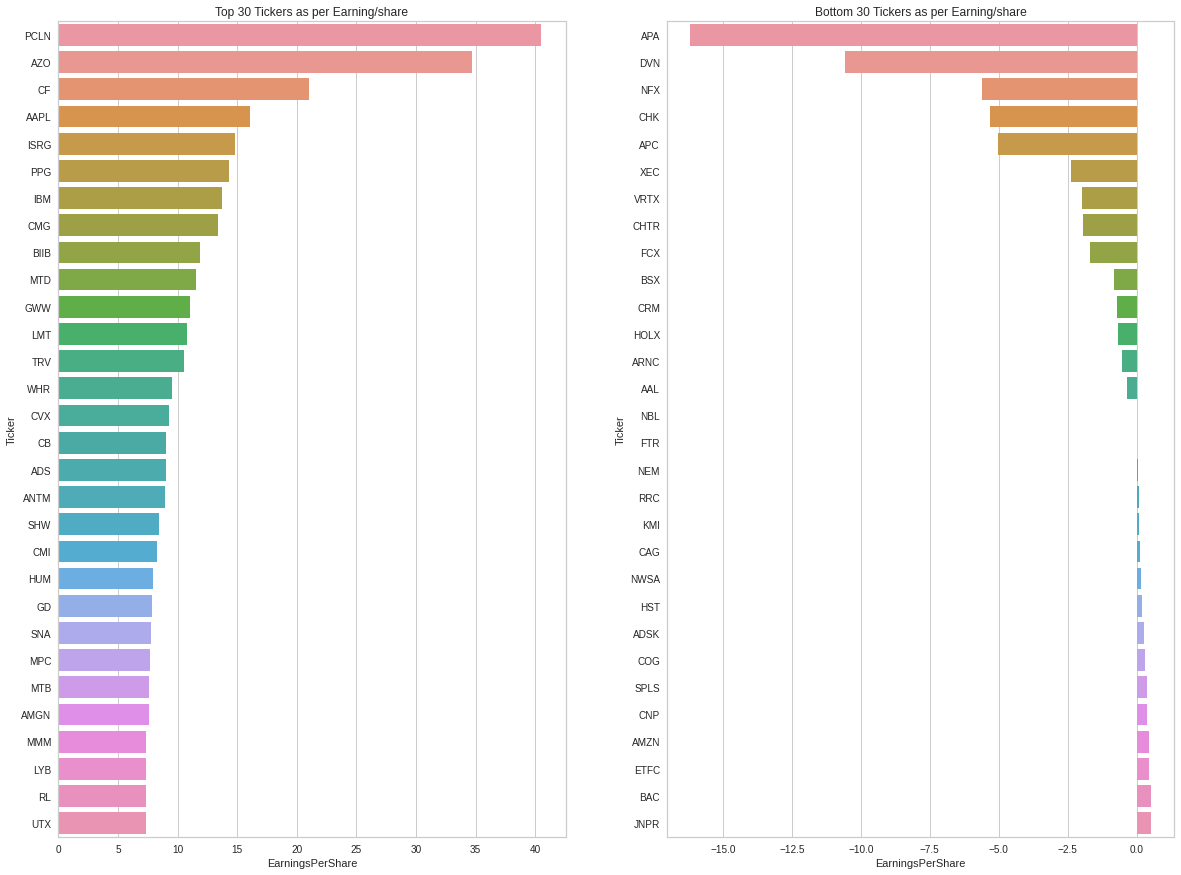

In [27]:
t_agg['Ticker'] = t_agg.index
bottom30 = t_agg.sort_values(by = 'EarningsPerShare').head(30)
top30 = t_agg.dropna().sort_values(by = 'EarningsPerShare',ascending=False).head(30)

fig = plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.title('Top 30 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'EarningsPerShare', data = top30)
plt.subplot(1,2,2)
plt.title('Bottom 30 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'EarningsPerShare', data = bottom30)

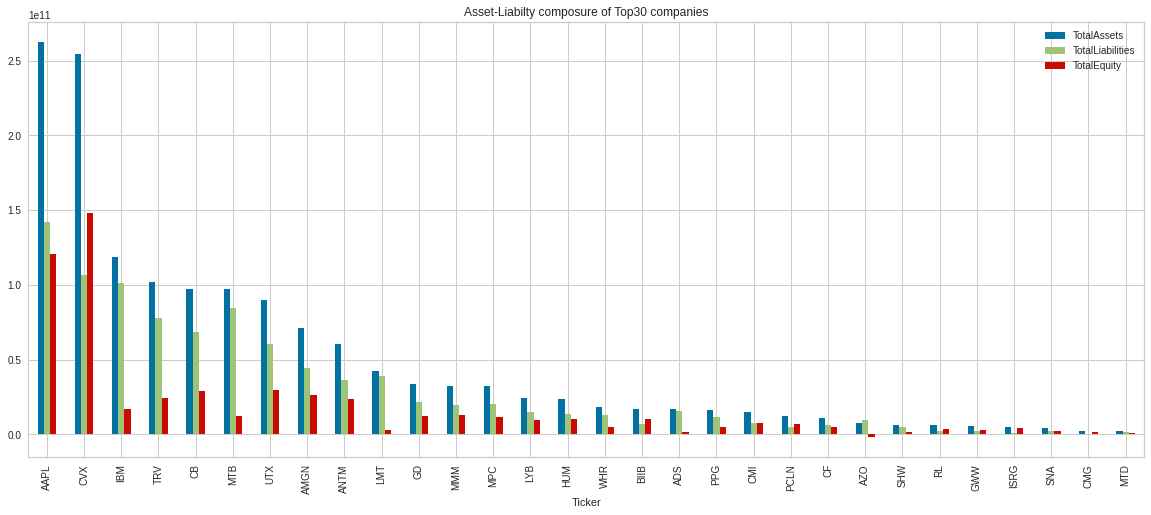

In [28]:
#top30.loc[:,['TotalAssets','TotalLiabilities','TotalEquity']]
top30.sort_values(by = 'TotalAssets',
                  ascending=False).plot(x='Ticker',y=['TotalAssets','TotalLiabilities','TotalEquity']
                                        ,kind='bar',figsize = (20,8),title='Asset-Liabilty composure'
                                        +' of Top30 companies')

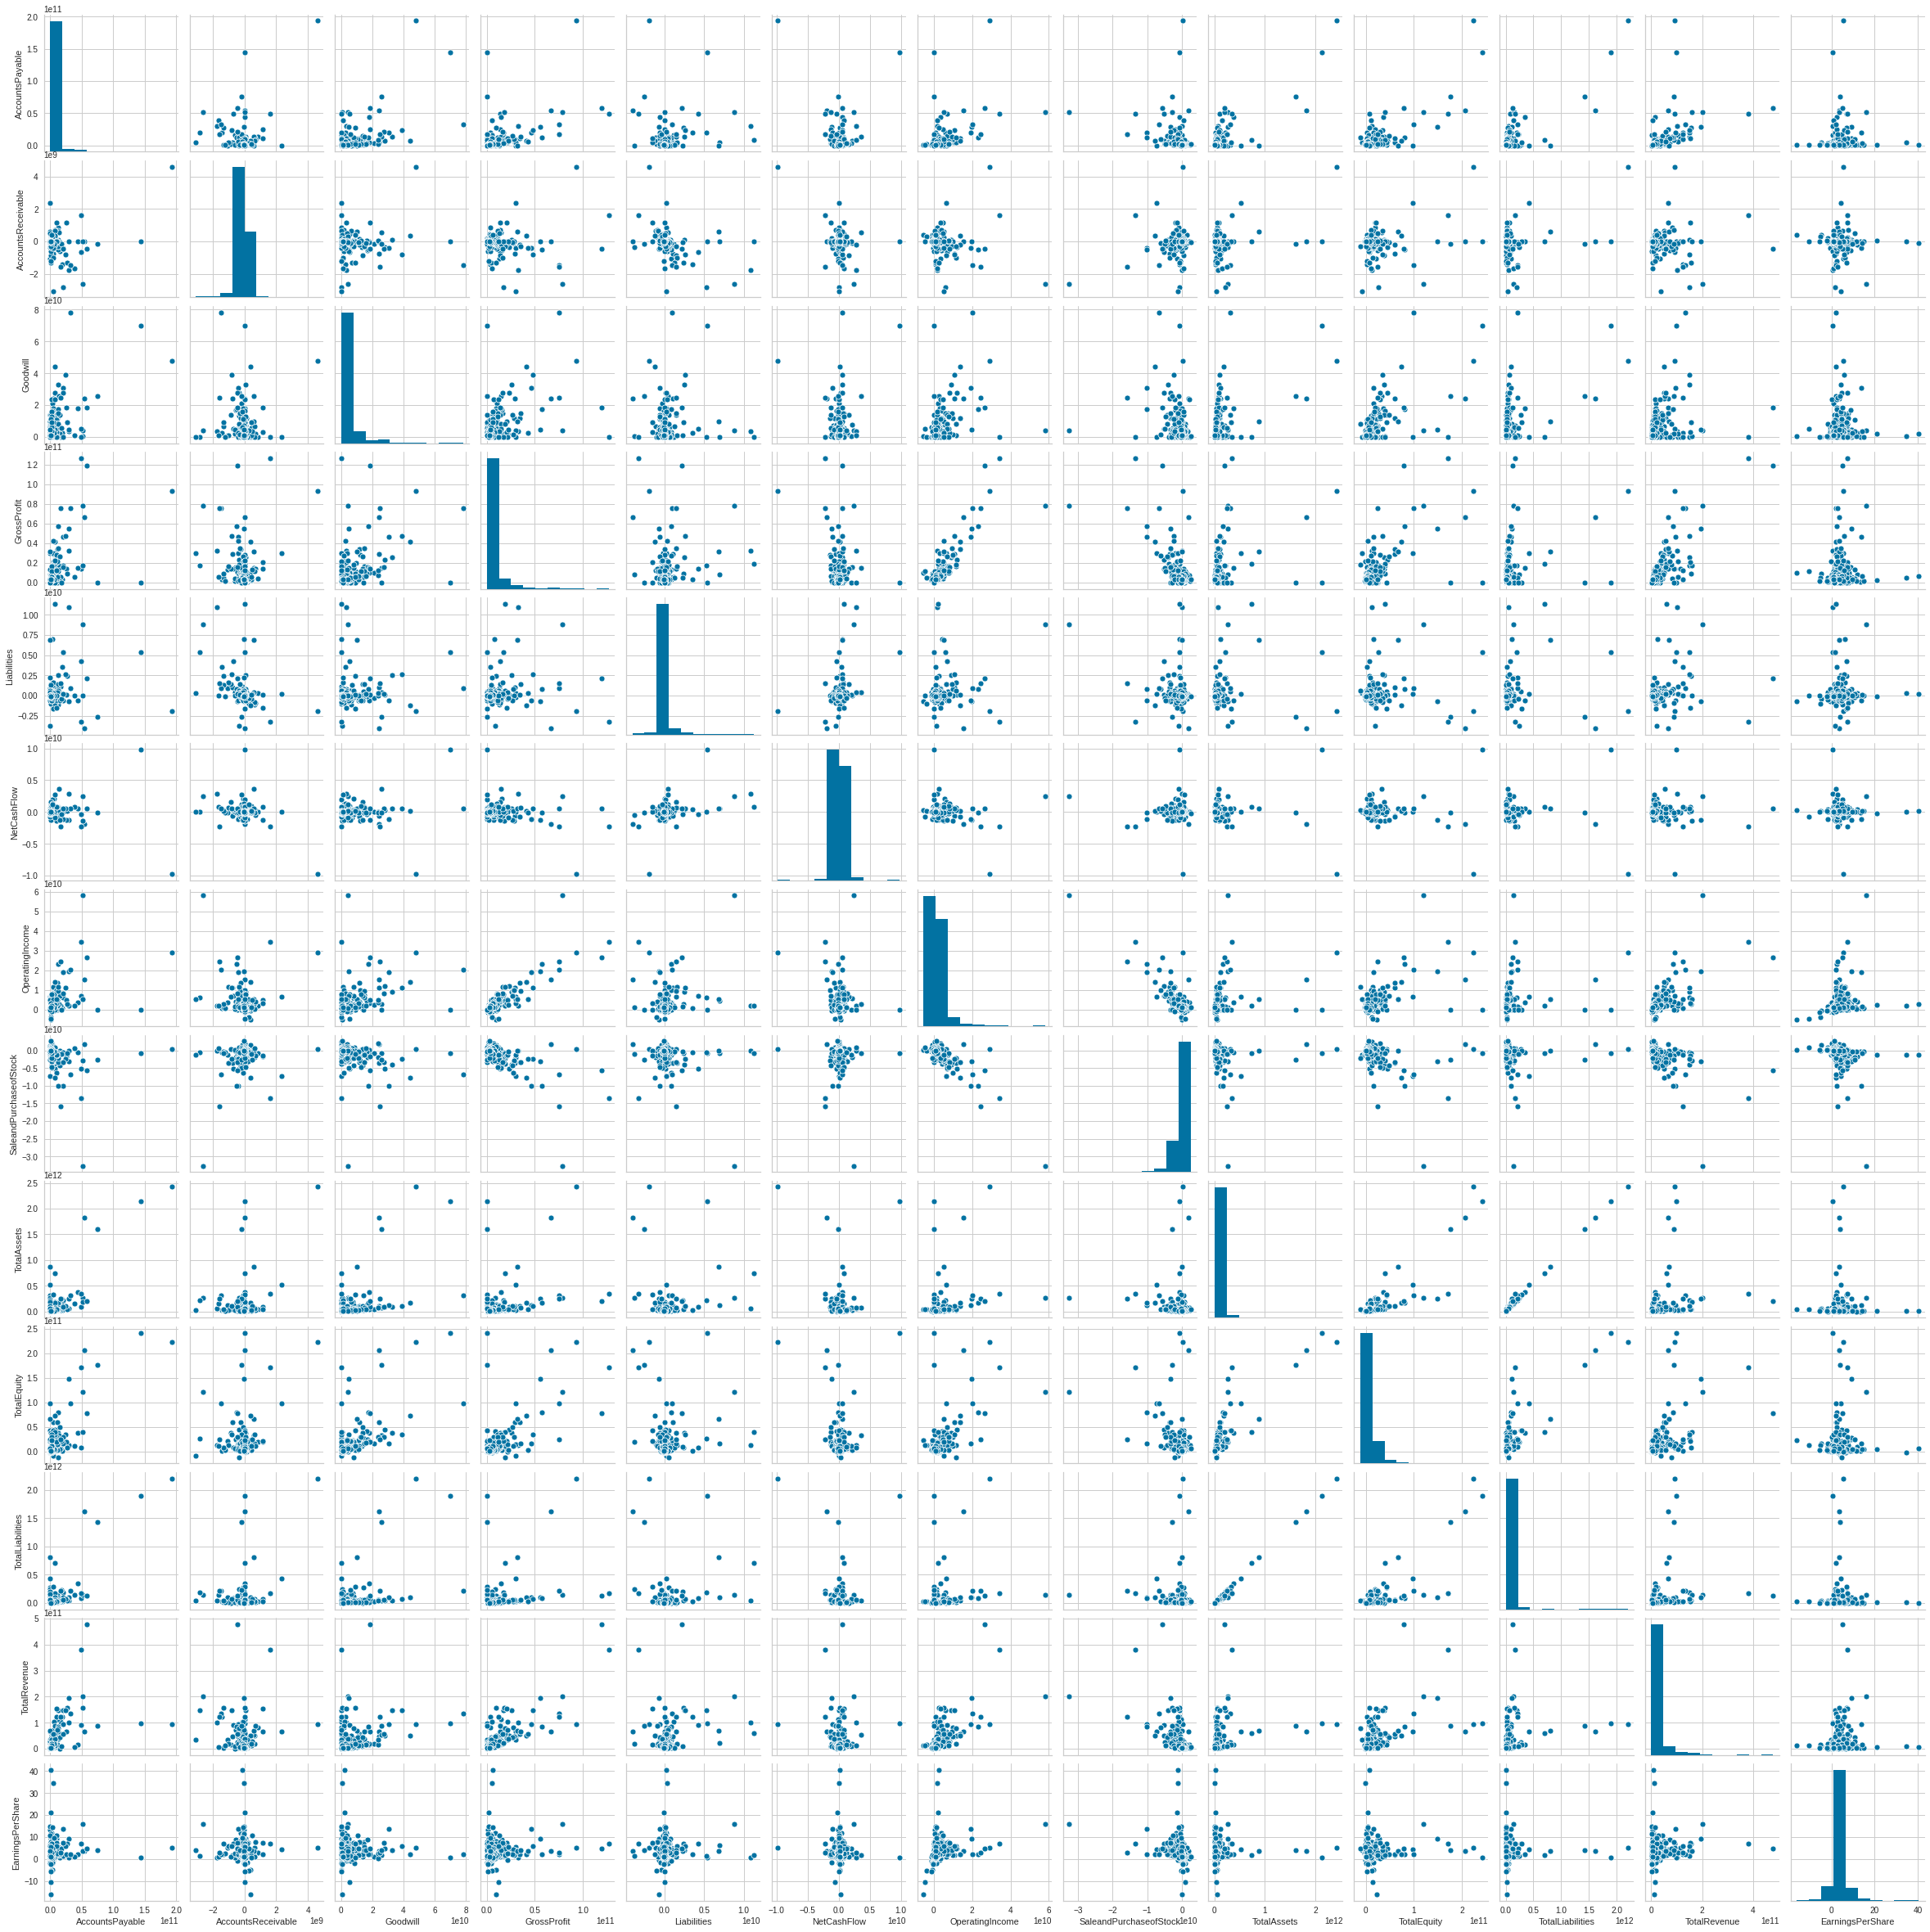

In [29]:
sns.pairplot(t_agg)

In [30]:
#PREPARE DATA FOR MODEL

In [31]:
#tick = df_fn[:,['TickerSymbol','ForYear']] #for future use
dataframe_fund.drop(columns = ['TickerSymbol','ForYear'],inplace=True)
y_col = dataframe_fund.columns[dataframe_fund.isna().any(axis =0)]
fn_pred = dataframe_fund[dataframe_fund.isna().any(axis =1)]
fn_prem = dataframe_fund[~dataframe_fund.isna().any(axis =1)]
y = fn_prem[y_col]
fn_prem.drop(columns = y_col)
ss = StandardScaler()
X = ss.fit_transform(fn_prem)
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2)

,AccountsPayable,AccountsReceivable,Goodwill,GrossProfit,Liabilities,NetCashFlow,OperatingIncome,SaleandPurchaseofStock,TotalAssets,TotalEquity,TotalLiabilities,TotalRevenue
0,3.068000e+09,-222000000.0,0.000000e+00,1.435600e+10,4.730000e+08,197000000.0,1.480000e+08,0.000000e+00,2.351000e+10,-7.987000e+09,2.489100e+10,2.485500e+10
1,4.975000e+09,-93000000.0,4.086000e+09,1.572400e+10,-2.350000e+08,660000000.0,1.399000e+09,0.000000e+00,4.227800e+10,-2.731000e+09,4.500900e+10,2.674300e+10
2,4.668000e+09,-160000000.0,4.091000e+09,2.703000e+10,-1.026000e+09,-146000000.0,4.249000e+09,-1.052000e+09,4.322500e+10,2.021000e+09,4.120400e+10,4.265000e+10
3,5.102000e+09,352000000.0,4.091000e+09,2.989400e+10,-6.330000e+08,-604000000.0,6.204000e+09,-3.846000e+09,4.841500e+10,5.635000e+09,4.278000e+10,4.099000e+10
4,2.409453e+09,-89482000.0,7.638900e+07,3.098036e+09,4.263230e+08,540210000.0,6.573150e+08,-1.860000e+07,4.613814e+09,1.210694e+09,3.403120e+09,6.205003e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0.000000e+00,0.0,1.014129e+09,0.000000e+00,4.263600e+07,-331115000.0,0.000000e+00,5.264380e+08,5.720887e+10,7.369530e+09,4.983934e+10,2.361631e+09
1776,0.000000e+00,0.0,1.014129e+09,0.000000e+00,-5.759000e+06,-43623000.0,0.000000e+00,-1.532770e+08,5.966952e+10,7.507519e+09,5.216201e+10,2.210591e+09
1777,1.381000e+09,-99000000.0,9.820000e+08,2.892000e+09,1.670000e+08,293000000.0,7.940000e+08,0.000000e+00,6.558000e+09,9.400000e+08,5.618000e+09,4.561000e+09
1778,1.071000e+09,69000000.0,9.760000e+08,3.068000e+09,-1.970000e+08,272000000.0,9.440000e+08,2.000000e+06,6.588000e+09,1.311000e+09,5.277000e+09,4.785000e+09


In [32]:
#Identification of number of clusters for the data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

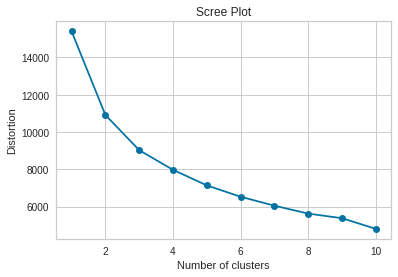


For  2  clusters avg silhoutte score is # 0.8564324753716985

For  3  clusters avg silhoutte score is # 0.8033339842644982

For  4  clusters avg silhoutte score is # 0.8041496281514628

For  5  clusters avg silhoutte score is # 0.651969269301257

For  6  clusters avg silhoutte score is # 0.6641102424548149

For  7  clusters avg silhoutte score is # 0.5454978850326572

For  8  clusters avg silhoutte score is # 0.5195512890907364

For  9  clusters avg silhoutte score is # 0.5141805278108852

For  10  clusters avg silhoutte score is # 0.5390890749683578


Text(0.5, 1.0, 'Silhouette Plot')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Silhouette Score')

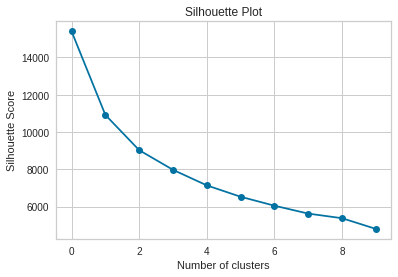

In [33]:
distortions = []
sil_sc = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_train)
    distortions.append(km.inertia_)
    if(i>1) : 
        sil_sc.append(silhouette_score(X_train, km.labels_))
        
# plot
plt.title('Scree Plot')
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

for i in range(0,9): print('\nFor ',(i+2),' clusters avg silhoutte score is #',sil_sc[i])
plt.plot(range(0, 10), distortions, marker='o')
plt.title('Silhouette Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
#from sklearn.cluster import KMeans
for i in range(2,11):
    model = SilhouetteVisualizer(KMeans(i),title = 'Silhouette for n_cluster = '+str(i))
    model.fit(X_train)
    model.show()

Text(0.5, 0.98, 'K-mean clusters formed with n_cluster = 2')

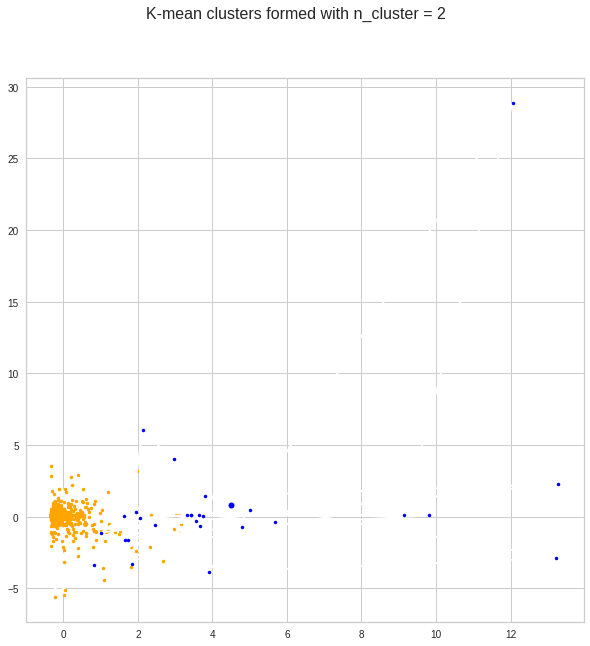

In [36]:
colors = ['orange', 'blue']
km = KMeans(n_clusters=2)
clusters = km.fit(X_train)
labels = clusters.labels_
ctr = clusters.cluster_centers_

fig = plt.figure(figsize = (10,10))
fig.suptitle('K-mean clusters formed with n_cluster = 2',fontsize = 16)
for k, col in zip(range(X_train.shape[0]), colors):
    my_members = (labels == k)
    cluster_center = ctr[k]
    plt.plot(X_train[my_members, 0], X_train[my_members, 1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

array([[ 22.66056  , -12.333353 ],
       [ -9.009385 ,  21.306732 ],
       [-16.92202  , -10.565805 ],
       ...,
       [-23.472618 ,  22.739586 ],
       [-24.464914 , -10.605986 ],
       [-43.43121  ,  -7.1633444]], dtype=float32)

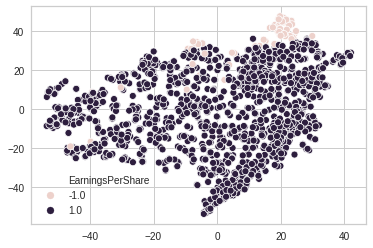

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_embedded = tsne.fit_transform(X_train)
X_embedded
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full',hue = np.sign(y_train['EarningsPerShare']))

In [ ]:
visualizer = InterclusterDistance(km, embedding= 'tsne')
visualizer.fit(X_train)        
visualizer.show()

<Figure size 720x720 with 0 Axes>

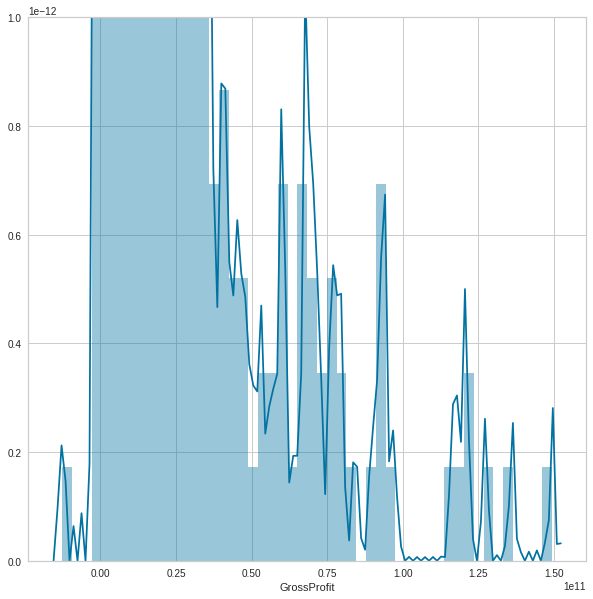

In [40]:
#Data Visualization
#Part1: Decription to be added
plt.figure(figsize=(10,10))
sns.distplot(dataframe_fund.GrossProfit)

<Figure size 720x720 with 0 Axes>

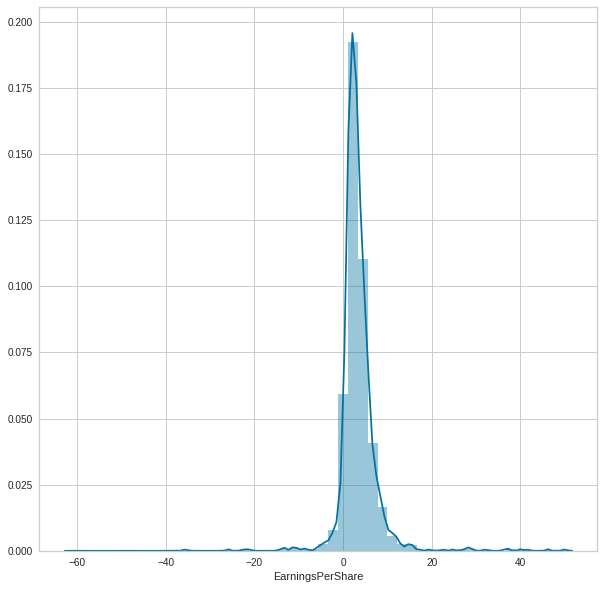

In [41]:
#Part 2: Decription to be added
plt.figure(figsize=(10,10))
sns.distplot(dataframe_fund.EarningsPerShare)

In [ ]:
#TO be corrected
#plt.figure(figsize=(10,10))
#sns.distplot(dataframe_fund.CurrentRatio)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

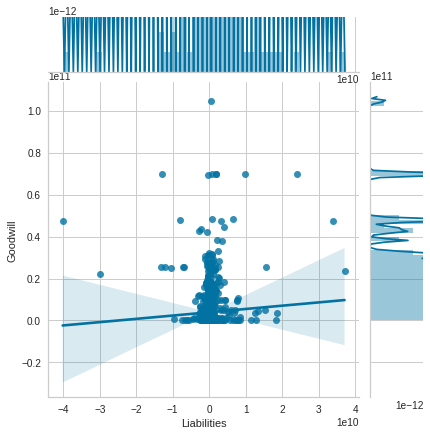

In [42]:
plt.figure(figsize=(10,10))
sns.jointplot(dataframe_fund.Liabilities,
              dataframe_fund.Goodwill,
              kind="reg")

<Figure size 720x360 with 0 Axes>

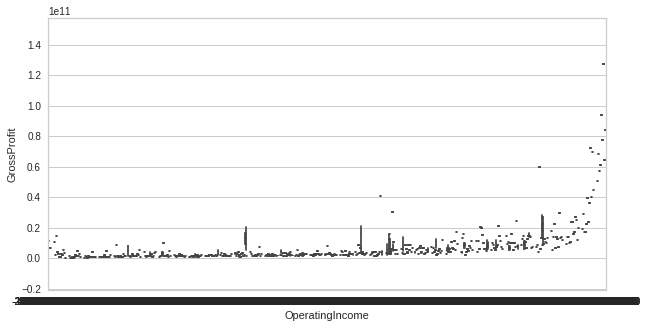

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x='OperatingIncome',
           y='GrossProfit',
           data=dataframe_fund)